## Predicting Customer Spending in the Apparel Industry: Insights from Linear and Polynomial Regression Models
Is the Apparel Industry Evolving? What Determines Customer Spending Success?

### Goal
The primary goal of this project is to develop and validate predictive models to forecast annual customer spending at a clothing business using various customer-related characteristics. This will enable the business to make informed decisions that improve marketing strategies, inventory management, and overall customer satisfaction and loyalty.




### Set up
Importing the necessary libraries I will use for this project

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error #model evaluation

###Reading in the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")

###Looking at the data

In [3]:
print(df.head())

   age  boredom_rating  risk_propensity  height  left_handed  reaction_time
0   34           78.87            10.53  146.79            0     900.949930
1   38            4.84            14.64  169.44            0     900.668926
2   38           23.52            14.17  167.76            1     901.703988
3   27           45.65            15.98  171.15            0     899.406904
4   34            0.88            10.58  158.15            0     899.728326


###Z-Scoring Continuous Variables for Predictive Modeling

In [4]:
#z scoring our continuous/interval data
predictors = ["age", "boredom_rating", "risk_propensity","height", "left_handed"]
contin = ["age", "boredom_rating", "risk_propensity", "height"]
X = df[predictors]
y = df["reaction_time"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

z = StandardScaler()
z.fit(X_train[contin])
#Xz_train = z.transform(X_train[contin])
#Xz_test = z.transform(X_test[contin])
X_train[contin] = z.transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

print(X_train[0:10])

          age  boredom_rating  risk_propensity    height  left_handed
382 -1.908254        1.002815        -1.092357  2.029158            0
994  0.614736       -0.475711        -1.932686 -0.899163            0
982  1.779194       -1.345812         0.048425  0.581087            0
47  -0.355645       -1.447556        -1.045411  0.346755            0
521  0.226584       -1.338326        -0.266112  0.083545            0
636 -0.161568        1.125997        -0.744959 -1.808436            0
19  -0.937873       -0.894938        -0.331836 -0.434625            0
366  0.420660        1.703116        -0.794252  0.821194            0
340  1.196965        0.538670         1.149302 -0.772096            0
952  1.002889       -1.549641        -1.383421 -0.556742            1


###Visualizing the Relationship Between Age and Reaction Time:

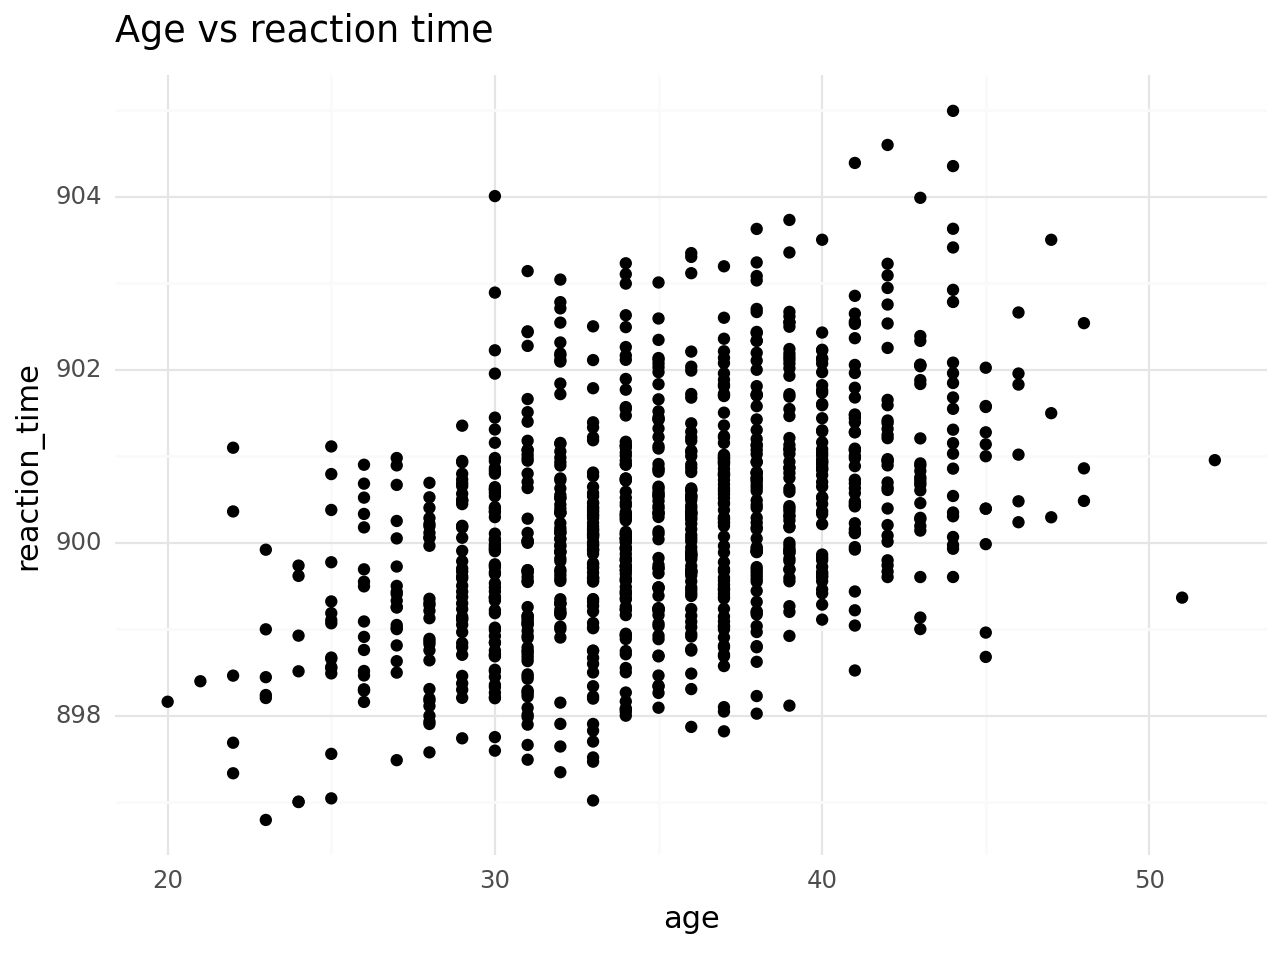

<Figure Size: (640 x 480)>

In [5]:
(ggplot(df, aes(x = "age", y = "reaction_time")) + geom_point() + theme_minimal()+ labs(title = "Age vs reaction time"))

###Visualizing the Relationship Between Boredom Rating and Reaction Time:

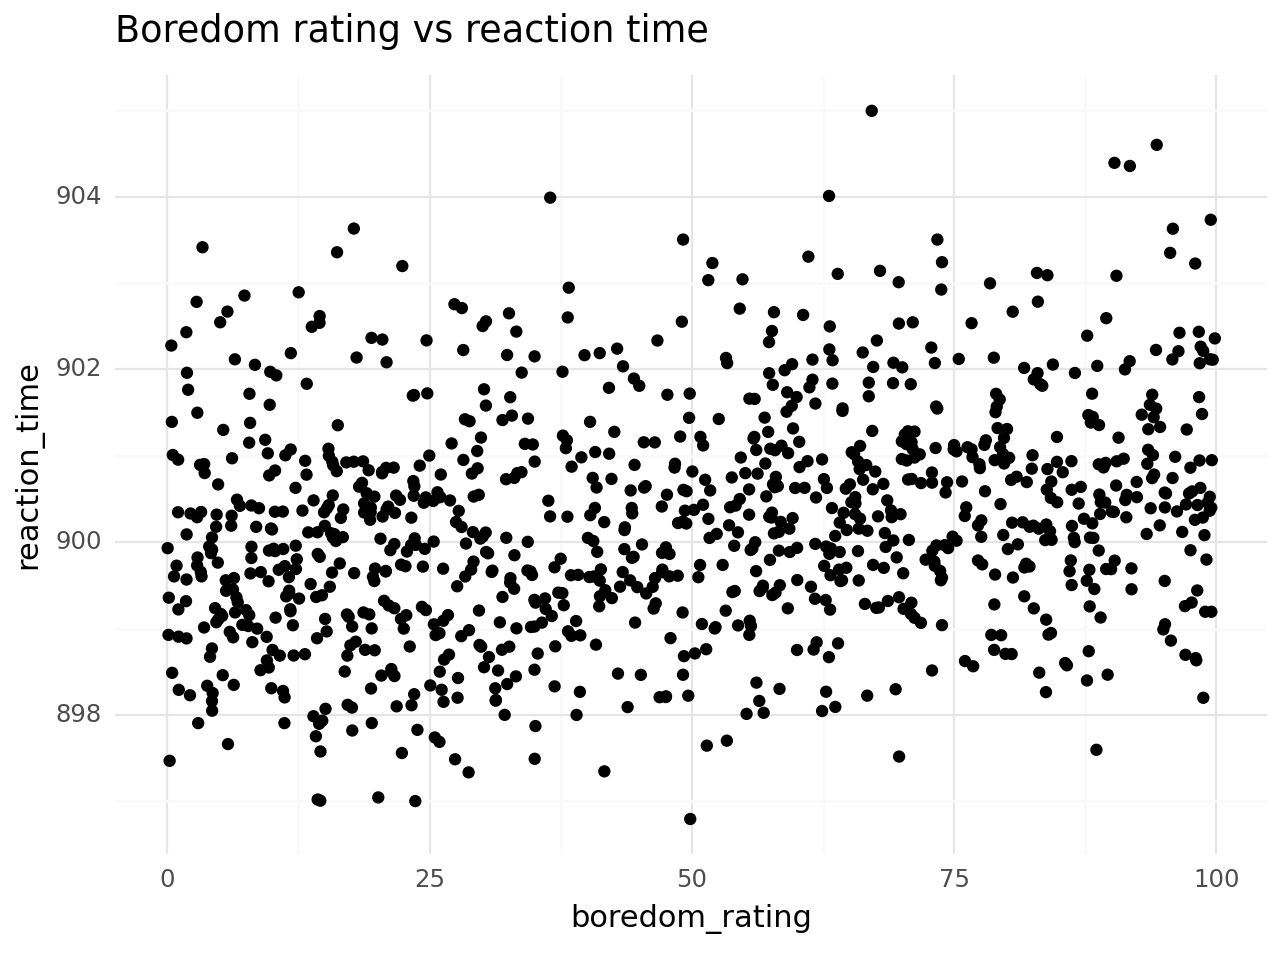

<Figure Size: (640 x 480)>

In [6]:
(ggplot(df, aes(x = "boredom_rating", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Boredom rating vs reaction time"))

###Visualizing the Relationship Between Risk Propensity and Reaction Time:

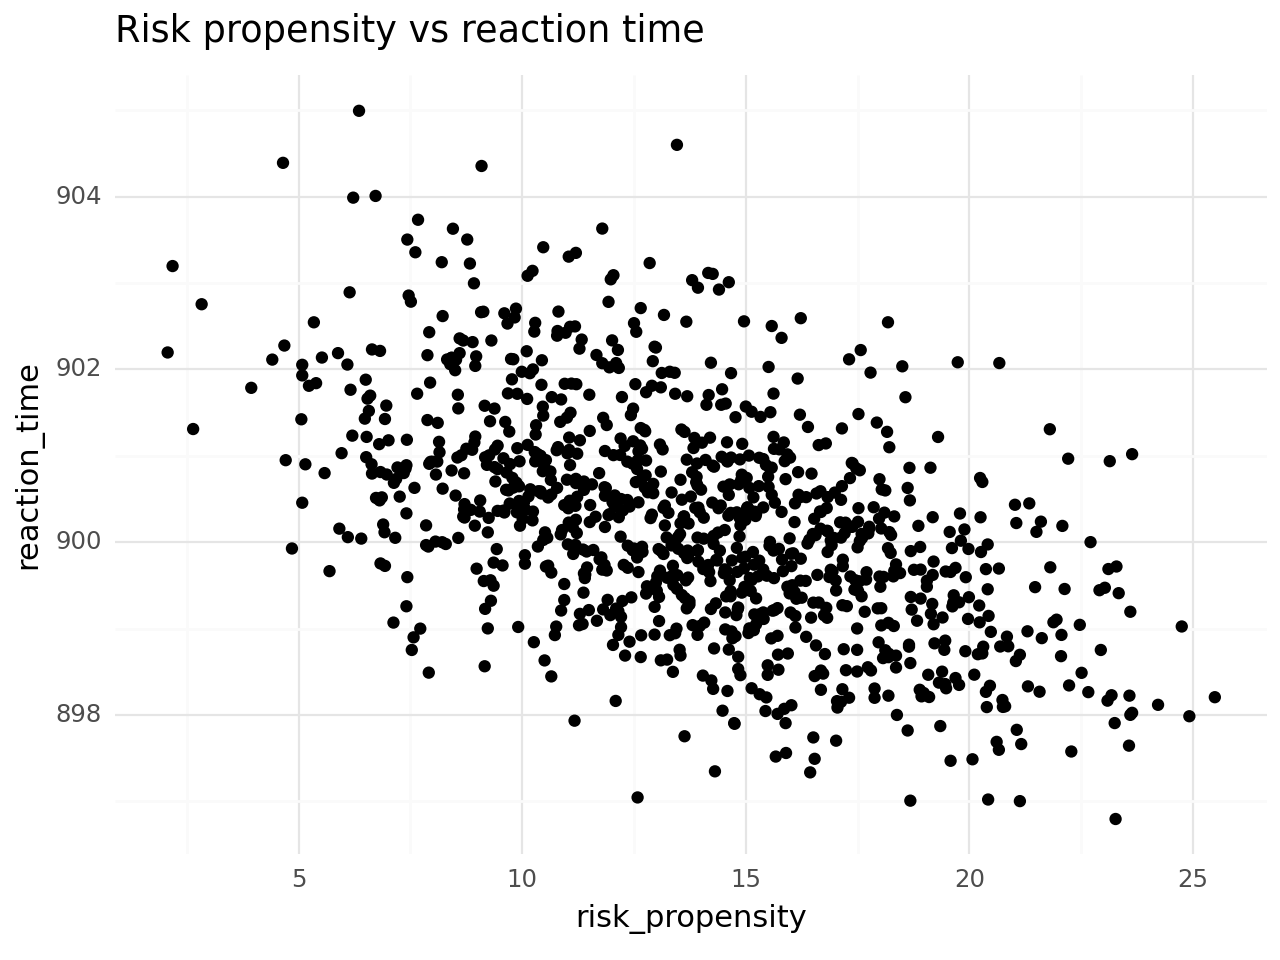

<Figure Size: (640 x 480)>

In [7]:
(ggplot(df, aes(x = "risk_propensity", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Risk propensity vs reaction time"))

###Visualizing the Relationship Between Height and Reaction Time:

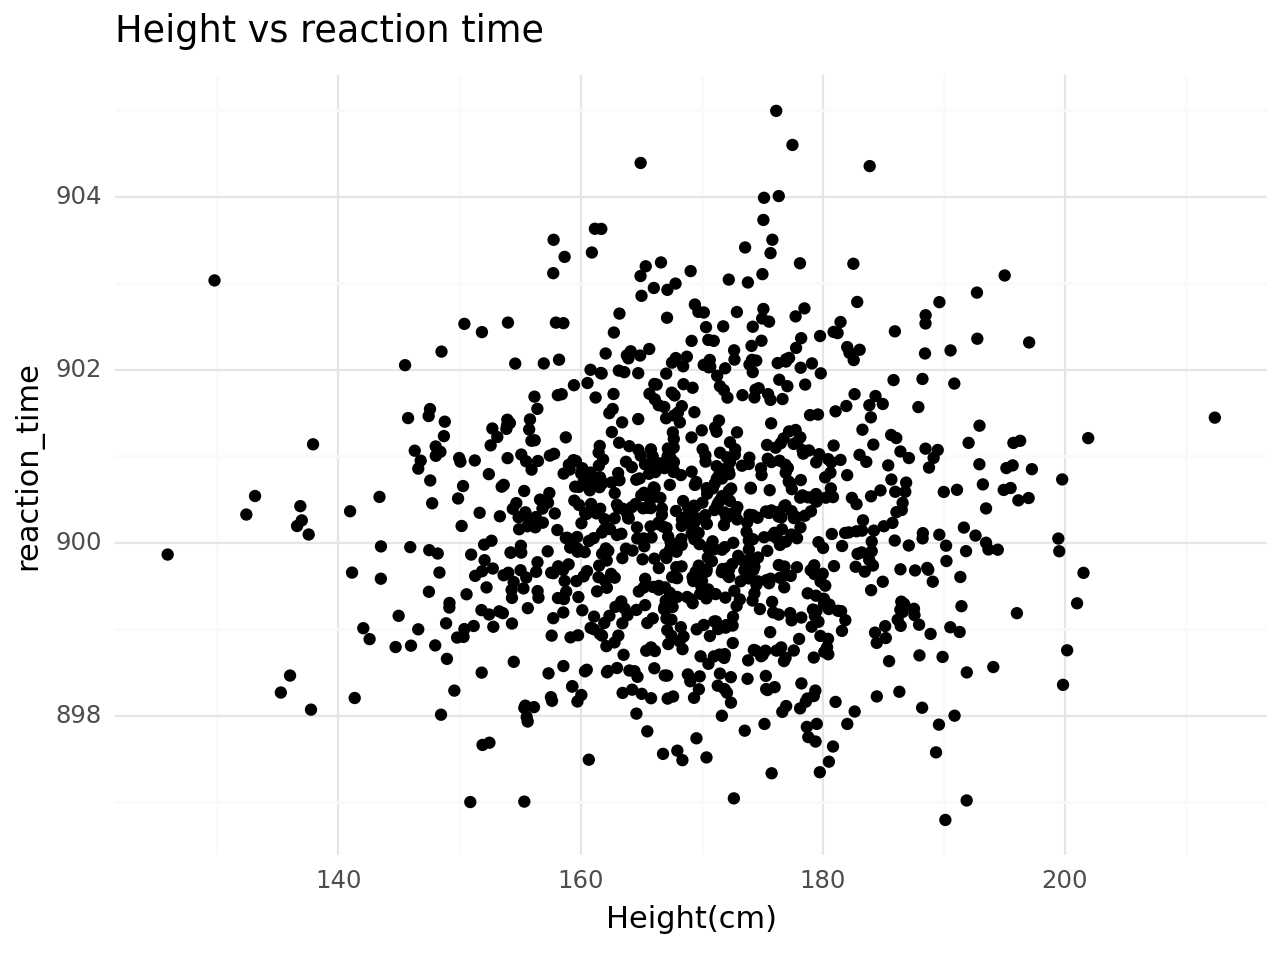

<Figure Size: (640 x 480)>

In [8]:
(ggplot(df, aes(x = "height", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Height vs reaction time", x = "Height(cm)"))

###Visualizing the Relationship Between Left Handedness and Reaction Time:

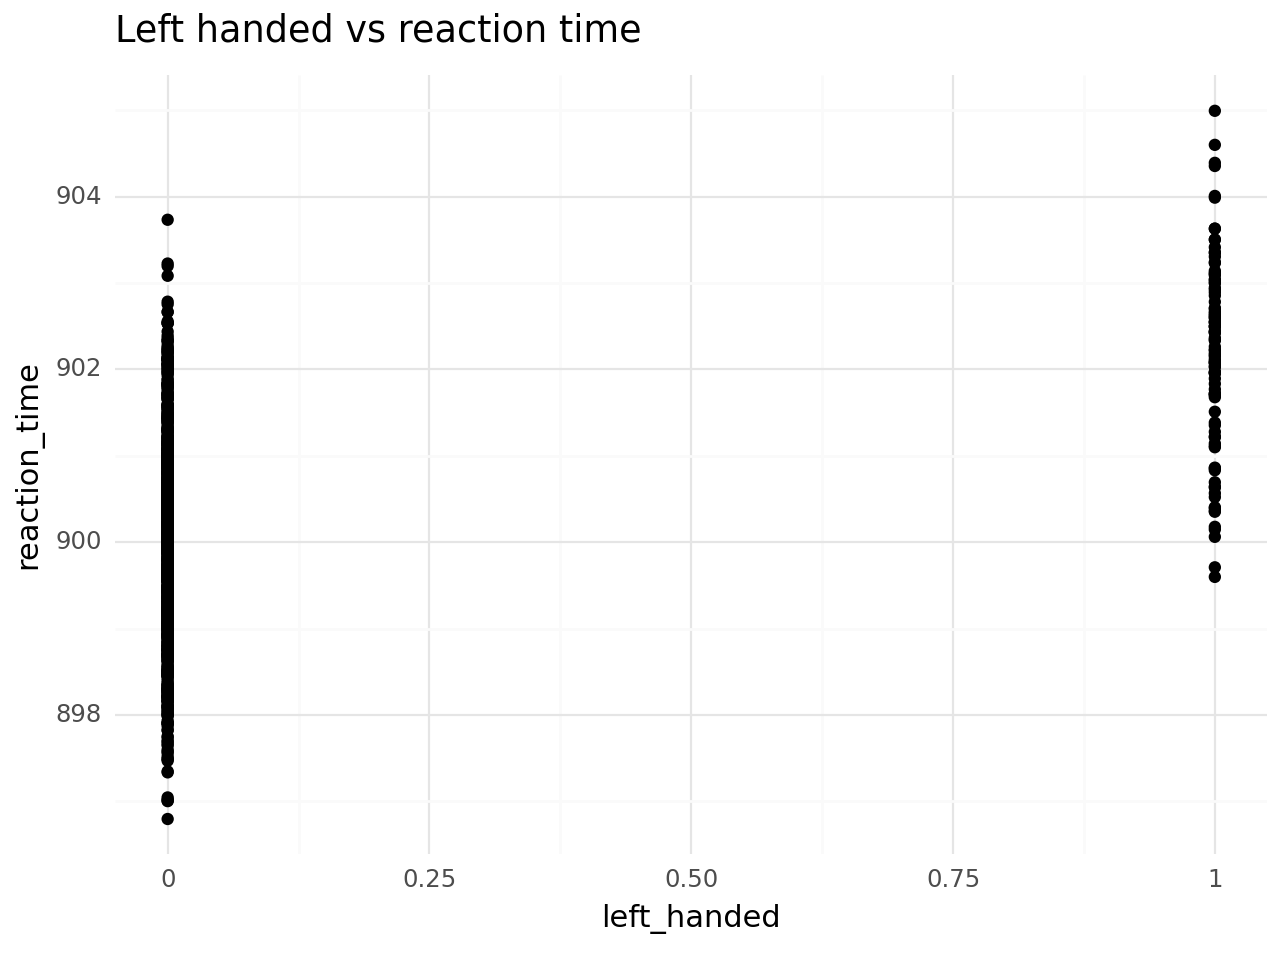

<Figure Size: (640 x 480)>

In [9]:
(ggplot(df, aes(x = "left_handed", y = "reaction_time")) + geom_point()+ theme_minimal()+ labs(title = "Left handed vs reaction time"))

###Building and Evaluating the Linear Regression Model:

In [10]:
#fitting our model and making predictions
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_on_train = lr.predict(X_train)
y_pred_on_test = lr.predict(X_test)

### Residual plot to check linearity:





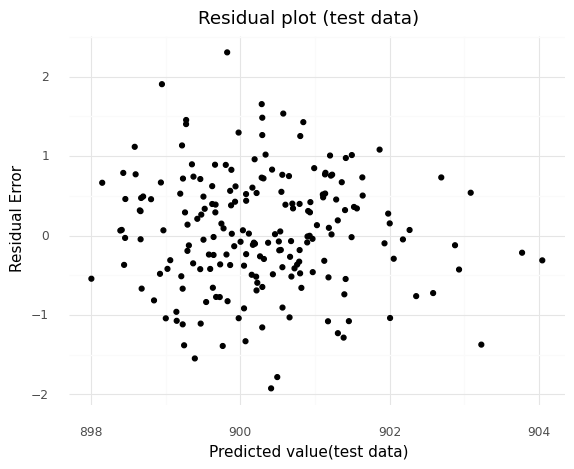

<ggplot: (8757800472289)>

In [ ]:
assump = pd.DataFrame({"Predicted":y_pred_on_test,
                      "Residual Error": y_pred_on_test - y_test})
(ggplot(assump,aes(x = "Predicted", y = "Residual Error"))+ geom_point()+ labs(title = "Residual plot (test data)", x = "Predicted value(test data)")+ theme_minimal())

Our graphs shown above proves that we are not violating the assumption of linearity. There appears to be a linear relationship between all of our predictor variables with the exception of left_handed, boredom_rating, and height

###Checking Homoscedasticity in Training Data

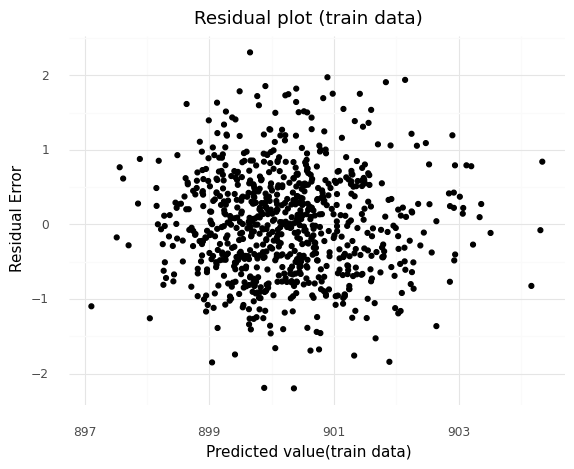

<ggplot: (8757800413981)>

In [ ]:
assump_2 = pd.DataFrame({"Residual Error": y_pred_on_train - y_train,
                     "predicted": y_pred_on_train})
(ggplot(assump_2,aes(x = "predicted", y = "Residual Error"))+ geom_point()+ labs(title = "Residual plot (train data)", x = "Predicted value(train data)") +theme_minimal())

After plotting the residuals containing the predicted values for the training set and the actual values of the training set, we see that our dataset is homoskedastic because the residual errors are evenly distributed among the dataset. As seen in the graph above, the residual errors are approximately evenly spread between 2 to -2.

Plotting Actual vs. Predicted Reaction Times for Training Data

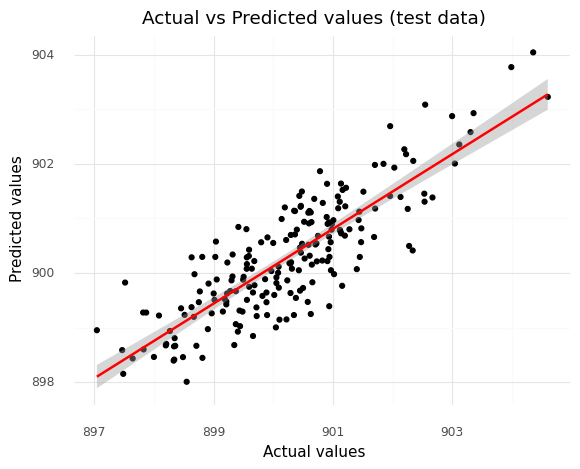

<ggplot: (8757800415213)>

In [ ]:
predictions_test_df = pd.DataFrame({"Actual values": y_test,
                               "Predicted values": y_pred_on_test})
(ggplot(predictions_test_df, aes(x = "Actual values", y = "Predicted values"))+ labs(title ="Actual vs Predicted values (test data)") + geom_point(color = "black")+theme_minimal()+geom_smooth(method = "lm", color = "red"))

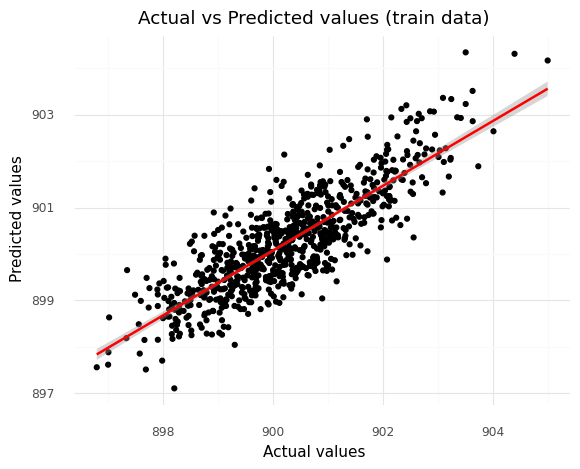

<ggplot: (8757798282445)>

In [ ]:
predictions_train_df = pd.DataFrame({"Actual values": y_train,
                               "Predicted values": y_pred_on_train})
(ggplot(predictions_train_df, aes(x = "Actual values", y = "Predicted values"))+ labs(title ="Actual vs Predicted values (train data)") + geom_point(color = "black")+theme_minimal()+geom_smooth(method = "lm", color = "red"))

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_on_train)
mae_test = mean_absolute_error(y_test, y_pred_on_test)
r2_train = r2_score(y_train, y_pred_on_train)
r2_test = r2_score(y_test, y_pred_on_test)
print("MAE train:", mae_train)
print("MAE test:", mae_test)
print("R2 train:", r2_train)
print("R2 test:", r2_test)

MAE train: 0.568953337687866
MAE test: 0.5831113411612864
R2 train: 0.6979795106942799
R2 test: 0.7048711526537743


Based on the mean absolute error scores printed above, the linear regression model did not perform very well with respect to the $r^2$ scores. Because we only have an $r^2$ value of $~0.698$ for the training set and an $r^2$ value of $~0.705$ for our test set, we cannot say our model is very accurate. In terms of mean absolute error, our model performed well with a mae of $0.569$ for the training set and $0.583$ for the test set. Our mean absolute error indicates that with our linear regression model we are able to predict the reaction time of a certain individual with an estimated absolute error between 0.569 and 0.583 seconds.

###Discussing Model Overfitting

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_on_train)
mae_test = mean_absolute_error(y_test, y_pred_on_test)
r2_train = r2_score(y_train, y_pred_on_train)
r2_test = r2_score(y_test, y_pred_on_test)
print("MAE train:", mae_train)
print("MAE test:", mae_test)
print("R2 train:", r2_train)
print("R2 test:", r2_test)


MAE train: 0.568953337687866
MAE test: 0.5831113411612864
R2 train: 0.6979795106942799
R2 test: 0.7048711526537743


After plotting residual plots and calculating the respective mean absolute errors and $r^2$ scores for the training and test sets, there is no significant difference between the accuracies of the training and test set. With respect to mean absolute error, there is a difference of 0.02 seconds of reaction time between the training set and the test set which allows me to conclude that the model is not overfitted.

###Plotting Coefficient Values of Predictor Variables

In [ ]:
coefficients = pd.DataFrame({"Coef": lr.coef_,
                             "Name": predictors})
coefficients = coefficients.append({"Coef": lr.intercept_,
                          "Name": "intercept"}, ignore_index = True)

coefficients

,Coef,Name
0,0.526745,age
1,0.296864,boredom_rating
2,-0.607662,risk_propensity
3,0.026834,height
4,1.903498,left_handed
5,900.049041,intercept


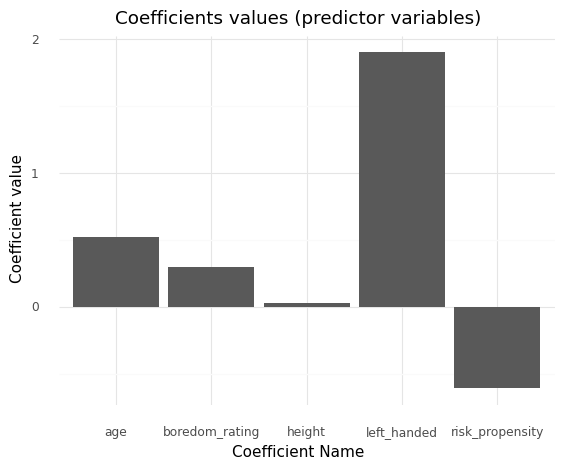

<ggplot: (8757798226397)>

In [ ]:
coefficients = pd.DataFrame({"Coef": lr.coef_,
                             "Name": predictors})
(ggplot(coefficients, aes(x = "Name", y = "Coef")) + geom_bar(stat = "identity") +theme_minimal() + labs(title = "Coefficients values (predictor variables)", x = "Coefficient Name", y = "Coefficient value"))



# import matplotlib.pyplot as plt
# plt.bar(coefficients.Name, coefficients.Coef)
# plt.title("Coefficients")
# plt.xlabel("Coefficient Name")
# plt.ylabel("Coefficient Value")
# plt.show()

## Discussing the Impact of Each Predictor on Reaction Time

Description:

* Age: For every 0.527 increase in age, we predict that reaction time will increase by 1 millisecond (ms).
* Boredom Rating: For every 0.297 increase in boredom rating, we predict that reaction time will increase by 1 ms.
* Risk Propensity: For every -0.608 decrease in risk propensity, we predict that reaction time will increase by 1 ms.
* Height: For every 0.027 increase in height, we predict that reaction time will increase by 1 ms.
* Left Handed: For every 1.9 increase in left-handed observations, we predict that reaction time will increase by 1 ms.

Conclusion:

In conclusion, left-handedness, risk propensity, and age have the most significant impact on reaction time in our linear regression model. Left-handedness has the largest positive coefficient, indicating a substantial increase in reaction time, while risk propensity has a negative coefficient, indicating that lower risk propensity is associated with increased reaction time. Age also shows a positive impact, though to a lesser extent compared to left-handedness and risk propensity.

##Exporting the Notebook to PDF

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/HW1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Class6-Completed.ipynb"